In [5]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [6]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
from keras.utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint

input_shape=data.shape[1:] #50,50,1
inp=Input(shape=input_shape)
convs=[]

parrallel_kernels=[3,5,7]

for k in range(len(parrallel_kernels)):

    conv = Conv2D(128, parrallel_kernels[k],border_mode='same',activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)

out = Concatenate()(convs)
conv_model = Model(input=inp, output=out)

model = Sequential()
model.add(conv_model)

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 3, activation="relu", input_shape=(100, 100,..., strides=1, padding="same")`
C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 5, activation="relu", input_shape=(100, 100,..., strides=1, padding="same")`
C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 7, activation="relu", input_shape=(100, 100,..., strides=1, padding="same")`
C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Model)              (None, 100, 100, 384)     11008     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 98, 98, 64)        221248    
_________________________________________________________________
activation_3 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 47, 47, 32)        18464     
_________________________________________________________________
activation_4 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)       

In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [8]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)


Train on 1745 samples, validate on 194 samples
Epoch 1/20
1745/1745 [==============================] - 309s 177ms/step - loss: 0.4540 - accuracy: 0.7857 - val_loss: 0.1355 - val_accuracy: 0.9639
Epoch 2/20
1745/1745 [==============================] - 307s 176ms/step - loss: 0.1700 - accuracy: 0.9398 - val_loss: 0.0364 - val_accuracy: 0.9845
Epoch 3/20
1745/1745 [==============================] - 306s 175ms/step - loss: 0.1311 - accuracy: 0.9559 - val_loss: 0.0611 - val_accuracy: 0.9794
Epoch 4/20
1745/1745 [==============================] - 329s 189ms/step - loss: 0.0937 - accuracy: 0.9639 - val_loss: 0.0455 - val_accuracy: 0.9897
Epoch 5/20
1745/1745 [==============================] - 324s 186ms/step - loss: 0.1007 - accuracy: 0.9610 - val_loss: 0.0311 - val_accuracy: 0.9897
Epoch 6/20
1745/1745 [==============================] - 313s 179ms/step - loss: 0.0740 - accuracy: 0.9771 - val_loss: 0.0490 - val_accuracy: 0.9845
Epoch 7/20
1745/1745 [==============================] - 310s 177

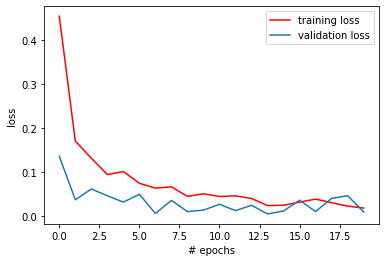

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

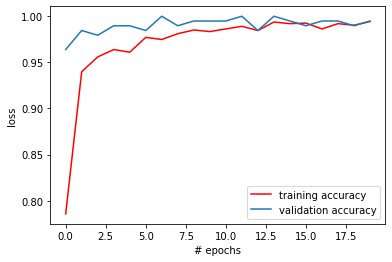

In [10]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
print(model.evaluate(test_data,test_target))

216/216 [==============================] - 7s 34ms/step
[0.008908812131267041, 0.9953703880310059]
